# Part I - (Exploration of San Francisco Bay bike-sharing 2019) 
## by (Salaudeen Qudus)
## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area which includes the station names, user type and duration of each rides.  
> Check [this](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) for the dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#loading the data
ride_data = pd.read_csv('201902-fordgobike-tripdata.csv')

#getting the first five observations

ride_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
#getting summary of the data
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**Initial observations**
- start_time and end_time column are of object data type instead of datetime
- There are missing values in some columns
- Weekday column is not in the dataset

## Data Cleaning

Copy the original data before cleaning

In [4]:
#copying the data before cleaning
ride_data_clean = ride_data.copy()

In [5]:
#converting start_time and end_time from object to datetime data type
ride_data_clean['start_time'] = pd.to_datetime(ride_data_clean['start_time'])
ride_data_clean['end_time'] = pd.to_datetime(ride_data_clean['end_time'])

In [6]:
#extracting the month start_time and end_time
ride_data_clean['start_month'] = ride_data_clean['start_time'].dt.month_name()
ride_data_clean['end_month'] = ride_data_clean['end_time'].dt.month_name()

#extracting weekday from start_time and end_time
ride_data_clean['start_weekday'] = ride_data_clean['start_time'].dt.strftime('%a')
ride_data_clean['end_weekday'] = ride_data_clean['end_time'].dt.strftime('%a')

In [7]:
#getting the first three observations
ride_data_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,end_month,start_weekday,end_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February,March,Thu,Fri
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February,March,Thu,Fri
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February,March,Thu,Fri


In [8]:
#getting summary of the data
ride_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
#checking unique values in gender column
ride_data_clean['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
#filling nan values in member_gender with 'Other'
ride_data_clean['member_gender'].fillna('Other',inplace=True)

In [11]:
#getting unique values in member_gender column
ride_data_clean['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [12]:
#getting statistical summary
ride_data_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
#dropping columns 
ride_data_clean.drop(columns=['start_station_id','end_station_id',
                              'member_birth_year'],axis=1,inplace=True)

In [14]:
#getting duration_min and duration_hr from duration_sec
ride_data_clean['duration_min'] = (ride_data_clean['duration_sec']/60).astype(np.int64)
ride_data_clean['duration_hr'] = (ride_data_clean['duration_sec']/3600).astype(np.int64)

In [15]:
#getting summary of the data
ride_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   start_station_latitude   183412 non-null  float64       
 5   start_station_longitude  183412 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   end_station_latitude     183412 non-null  float64       
 8   end_station_longitude    183412 non-null  float64       
 9   bike_id                  183412 non-null  int64         
 10  user_type                183412 non-null  object        
 11  member_gender            183412 non-null  object        
 12  bike_share_for_a

In [16]:
#getting the first five observations
ride_data_clean.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,start_weekday,end_weekday,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,February,March,Thu,Fri,869,14
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Other,No,February,March,Thu,Fri,708,11
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,February,March,Thu,Fri,1030,17
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,February,March,Thu,Fri,608,10
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,February,March,Thu,Fri,26,0


In [17]:
#getting unique values in user_type
ride_data_clean['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [40]:
#storing the cleaned data
ride_data_clean.to_csv('ride_data_clean.csv')

In [18]:
#summary of the data
ride_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   start_station_latitude   183412 non-null  float64       
 5   start_station_longitude  183412 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   end_station_latitude     183412 non-null  float64       
 8   end_station_longitude    183412 non-null  float64       
 9   bike_id                  183412 non-null  int64         
 10  user_type                183412 non-null  object        
 11  member_gender            183412 non-null  object        
 12  bike_share_for_a

### What is the structure of your dataset?

> This dataset contains 183412 observations and 19 columnns containing riders' information,details of their ride and the station information

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset are user_type,duration_sec,start_time and end_time

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help in investing the main features above include start_month,end_month,start_weekday,end_weekday and member_gender

## Univariate Exploration


### Categories of bicycle service users

In [19]:
#function to plot value counts
def function(x,label=''):
    print("The count of each unique values in the column are: {} ".format(x.value_counts()))
    pl = sb.countplot(x=x)
    pl.set_title(label)

The count of each unique values in the column are: Subscriber    163544
Customer       19868
Name: user_type, dtype: int64 


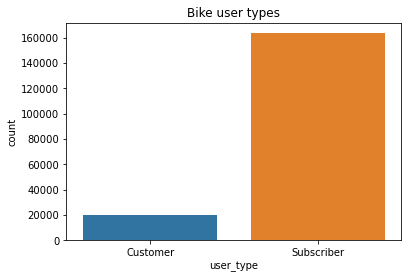

In [20]:
#applying function to user_type columns
function(ride_data_clean['user_type'],label='Bike user types')

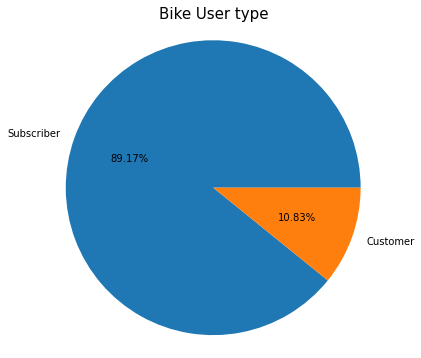

In [21]:
# Show user type by its percentage

plt.figure(figsize=(10,6))
sort_count = ride_data_clean['user_type'].value_counts()
plt.pie(sort_count, labels = sort_count.index, autopct='%0.2f%%');
plt.axis('square')
plt.title('Bike User type', fontsize=15);

Most of the users are Subscribers(89.17% of the total 183412 users are subsribers)

### Distribution of trip durations

In [22]:
#statistical summary of duration_sec column
ride_data_clean['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

The average trip duration is 726.078435 which is approximately 12minutes with the maximum value being 85444(about 1424minutes). There are outliers

Text(0.5, 0, 'Trip durations(seconds)')

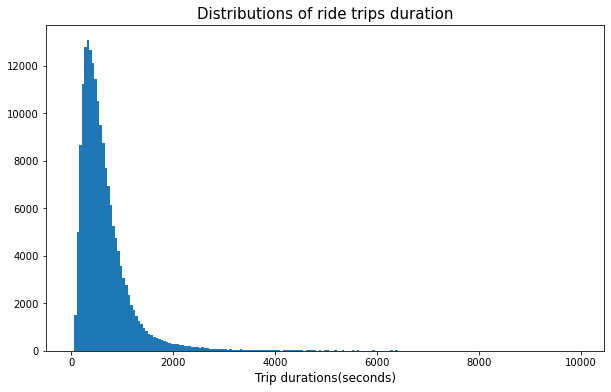

In [23]:
#histogram of duration_sec
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(ride_data_clean.duration_sec, bins=bins)
plt.title('Distributions of ride trips duration',fontsize=15);
plt.xlabel('Trip durations(seconds)',fontsize=12)

The distribution of the duration of trips(in seconds) is right skewed

### Number of trips by day 

In [24]:
#getting unique values in start_weekday
ride_data_clean['start_weekday'].unique()

array(['Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

Text(0.5, 1.0, 'Distributions of trips by day')

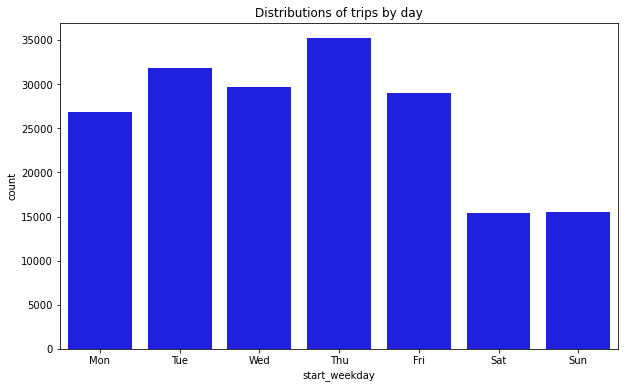

In [25]:
#countplot of start_weekday column
plt.figure(figsize=(10,6))
pl = sb.countplot(x=ride_data_clean['start_weekday'],order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],color='blue')
pl.set_title("Distributions of trips by day")


Weekends has the least usage of the bike-share system with majority of the usage being on Weekdays

### Gender of users

The count of each unique values in the column are: Male      130651
Female     40844
Other      11917
Name: member_gender, dtype: int64 


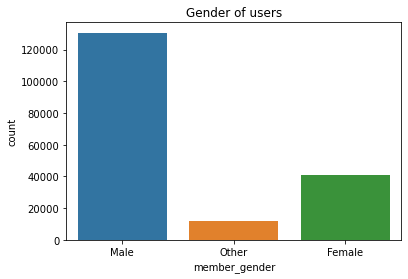

In [26]:
#applying the defined function to member_gender
function(ride_data_clean['member_gender'],label='Gender of users')

Majority of the users are males(71% of the users are males)

### Most used start stations

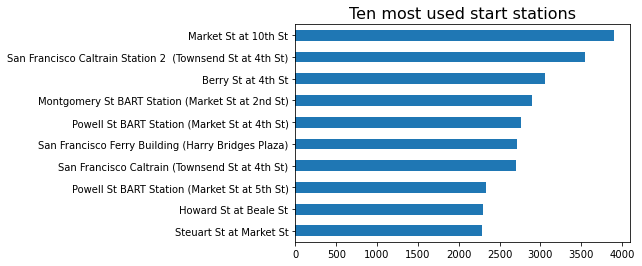

In [27]:
#bar chart of ten most used start_station_name
plt.title('Ten most used start stations', fontsize=16)
ride_data_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

The two most used start stations are Market St at 10th St and San Francisco Caltrain Station 2. How about checking the most used end stations?

### Most used end stations

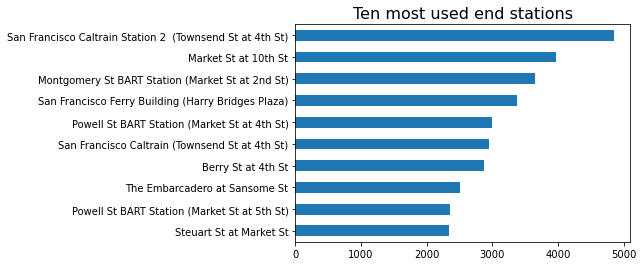

In [28]:
#bar chart of most ten most used start_station_name
plt.title('Ten most used end stations', fontsize=16)
ride_data_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

The two most used end stations are San Francisco Caltrain Station 2 and Market St at 10th St 

### least used start stations

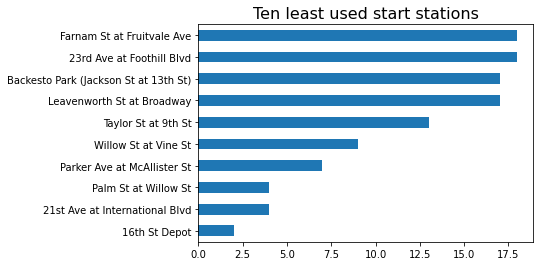

In [29]:
#bar chart of ten least used start_station_name
plt.title('Ten least used start stations', fontsize=16)
ride_data_clean.start_station_name.value_counts(ascending=True).head(10).plot.barh();

The least used start station is 16th St Depot

### least used end stations

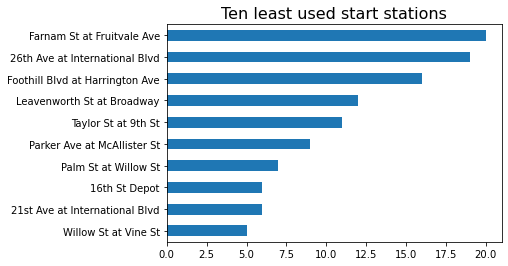

In [30]:
#bar chart of ten least used start_station_name
plt.title('Ten least used start stations', fontsize=16)
ride_data_clean.end_station_name.value_counts(ascending=True).head(10).plot.barh();

The three least used end stations are Willow St at Vine Str, 21st Ave at International Blvd and 16th St Depot

### Most popular stations(start and end)

In [31]:
# creating new variable for ten most used end and start stations
most_used_start = ride_data_clean.start_station_name.value_counts(ascending=True).tail(10)
most_used_end = ride_data_clean.end_station_name.value_counts(ascending=True).tail(10)

# filtering out the stations popular in both
most_popular_stations=[]
for x in most_used_start.index:
    if x in most_used_end:
        most_popular_stations.append(x)
        print(x)
        

Steuart St at Market St
Powell St BART Station (Market St at 5th St)
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
Powell St BART Station (Market St at 4th St)
Montgomery St BART Station (Market St at 2nd St)
Berry St at 4th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Market St at 10th St


In [32]:
most_popular_stations

['Steuart St at Market St',
 'Powell St BART Station (Market St at 5th St)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'Powell St BART Station (Market St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Berry St at 4th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Market St at 10th St']

### Least popular stations(start and end)

In [33]:
# creating new variable for ten most used end and start stations
least_used_start = ride_data_clean.start_station_name.value_counts(ascending=True).head(10)
least_used_end = ride_data_clean.end_station_name.value_counts(ascending=True).head(10)

# filtering out the stations popular in both
for x in least_used_start.index:
    if x in least_used_end:
        print(x)

16th St Depot
21st Ave at International Blvd
Palm St at Willow St
Parker Ave at McAllister St
Willow St at Vine St
Taylor St at 9th St
Leavenworth St at Broadway
Farnam St at Fruitvale Ave


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of trips(in seconds) is a right skewed distribution with the mean duration being 726seconds indicating there are outliers in the dataset which probably results from some users spending long hours. However,no transformation was done as there isn't enough information to know how to go about handling outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Other features such as month and weekday were extracted from the datetime columns for specific analysis

## Bivariate Exploration



### Daily usage of bike-sharing system based on user type

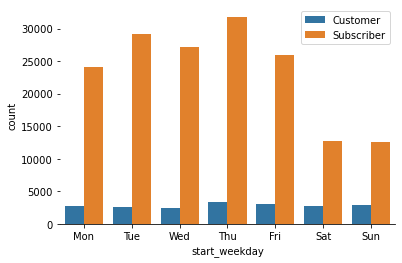

In [34]:
#countplot of start_weekday by user_type
tl = sb.countplot(x=ride_data_clean['start_weekday'],hue=ride_data_clean.user_type,
                 order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

#remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

While the number of bike-sharing for subscribers decrease drastically during weekends,there isn't significant difference in bike-sharing during weekdays and weekends among customers

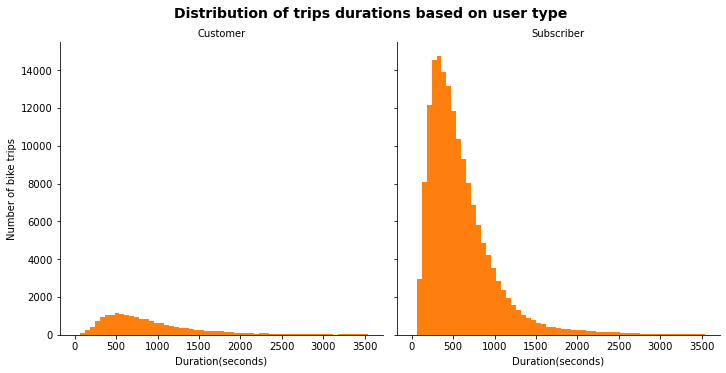

In [35]:
#plotting histogram to show the distribution of trips duration based on user type
pl = sb.FacetGrid(ride_data_clean, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0, 3600,60)
pl.map(plt.hist, "duration_sec", color=sb.color_palette()[1], bins=bin_edges)
pl.set_axis_labels("Duration(seconds)", "Number of bike trips") #setting x and y-axis label
pl.set_titles(col_template = '{col_name}')
pl.fig.suptitle('Distribution of trips durations based on user type', y=1.03, fontsize=14, fontweight='semibold');

The distribution of both the Customers and Subscribers duration(seconds) are right skewed with Subscribers distribution having a higher peak. This makes sense since majority of the users are subscribers

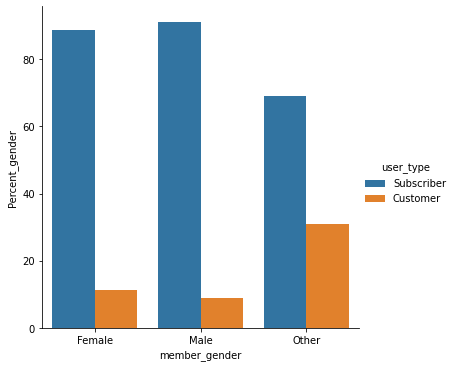

In [36]:
#getting value_counts by grouping by age_range and no_show 
new_c = ride_data_clean.groupby('member_gender')['user_type'].value_counts(normalize=True)

#creating a percent_age variable
new_c = new_c.mul(100).rename('Percent_gender').reset_index()

#catplot to show percentage of age_ranges
hl = sb.catplot(x='member_gender', y='Percent_gender', hue='user_type', kind='bar', data=new_c)

There isn't much significant difference between the  percentage of male subsribers to male customers and that of female subsribers

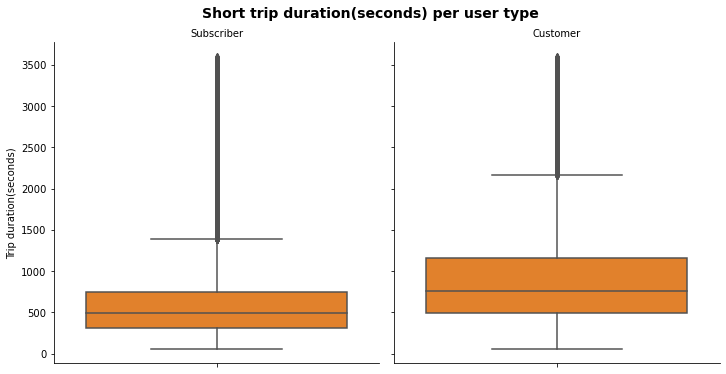

In [37]:
# code for the (boxplot) duration (sec) distribution per user type

short_trips = ride_data_clean.query('duration_sec < 3600')
cl = sb.catplot(data=short_trips, y='duration_sec', col="user_type", kind='box',
            color = sb.color_palette()[1])
cl.set_titles(col_template = '{col_name}')
cl.set_axis_labels("", "Trip duration(seconds)")
cl.fig.suptitle('Short trip duration(seconds) per user type', y=1.03, fontsize=14, fontweight='semibold');

The boxplot above shows that Customers tends to go for trips with short duration than Subscribers indicating that customers probably use the bike-sharing system for leisure a lot

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The usage of the bike-sharing systems varies by user type. Subscribes tends to use the system on weekdays because the usage of the system by subscribers dropped drastically on weekends. There isn't much difference between the usage of bike-sharing by customers on weekdays and weekends. The difference between the percentage male subscribers and female subscribers is not significant implying that male and female subscribers tends to use the bike-sharing system equally

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most subscribers use the service at peak hours and customers tends to use the system for fun 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Weekday usage duration(minutes) by users

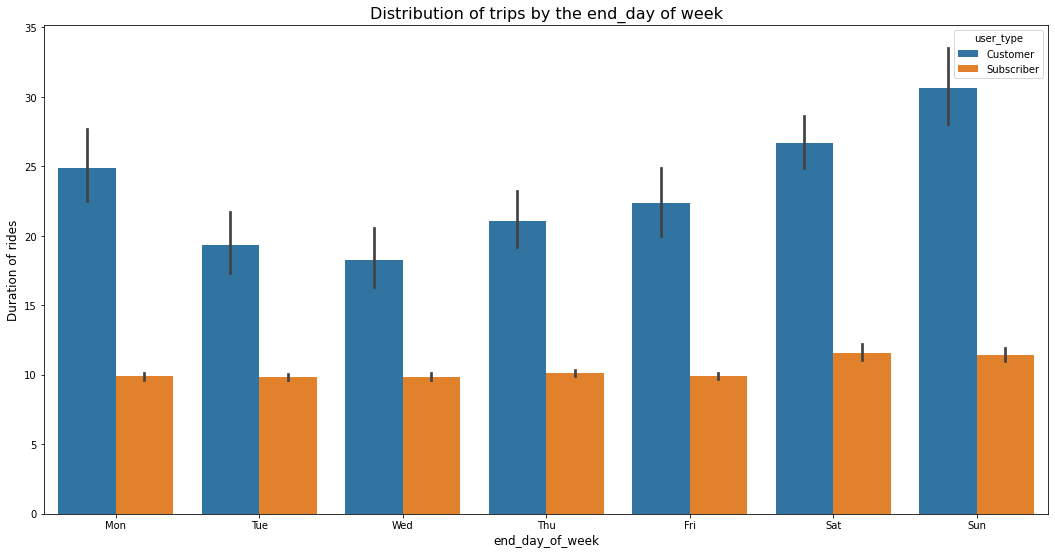

In [38]:
#plotting bar chart
plt.figure(figsize=(18,9))
base_color = sb.color_palette()[1]

sb.barplot(data=ride_data_clean, x='end_weekday', y='duration_min',
           order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],hue='user_type')

#setting x and y label
plt.xlabel('end_day_of_week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the end_day of week", fontsize=16);

The duration of rides of trips by Customers increased on weekends indicating but there isn't much difference in the duration of trips by Subscribers on weekends. Generally,Customers tends to have a longer duration of trip than Subscribers 

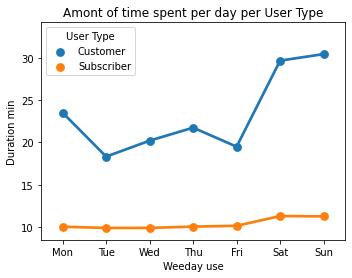

In [39]:
plt.figure(figsize=[12, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=ride_data_clean, x='start_weekday', y='duration_min', hue='user_type', 
             order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],errwidth=0)
plt.xlabel('Weeday use')
plt.ylabel('Duration min')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type')

It can be seen that Customers spend more time on the trips than subscribers and during weekends,the duration of trips increased significantly for customers. The duration of trips of subscribers is around 10mins with a slight increase on weekends. This indicate that subscribers seems to have a specific constant reason for usage of the bike-sharing system

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Customers spend more time on trips than Subsribers. Subscribers have stable duration in the usage of the system with the duration on weekdays not quite different from weekends

### Were there any interesting or surprising interactions between features?

> Using either start_weekday and end_weekday,we are still able to see that Customers spend more time during trips on weekends than on weekdays

## Conclusions
- There are more subscribers than customers among the users 

-  Most of the users are males(71% of the users are males)
- Subscribers have a stable duration of usage of the bike-sharing system unlike customers. What's more? Customers spend longer durations on trips than subscribers with a significant increase in duration of Customers on Weekends
- Most of the ride trips were on weekdays. This makes sense despite the increase in the usage by Customers on weekends since the majority of the users are subscribers and there is no significant increase in the usage of the system by subscribers on weekends
- The most popular stations are Steuart,Powell St BART Station,San Francisco Caltrain,San Francisco Ferry Building,Montgomery St BART Station,Berry St at 4th St,San Francisco Caltrain Station 2 and Market Station at 10th St

## Limitation
It is has been observed that Customers tends use the bike-sharing system for longer durations and even more on weekends than subscribers.Moreover,the duration of their usage isn't stable indicating they are probably using at their leisure time(for fun),however,more information is needed to support this 